We will bulid and train a neural network to classify different fashion items. 
We will be using TensorFlow, keras a high level API. 

In [1]:
import tensorflow as tf

In [2]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

d:\mlcodes\udacity\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
#load fashion mist dataset 
dataset, metadata = tfds.load('fashion_mnist',as_supervised= True, with_info= True)

train_data, test_data = dataset['train'], dataset['test']


Dataset fashion_mnist downloaded and prepared to C:\Users\kusha\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


Loading dataset will return metadata and dataset 
we seperate that to train and test data 

Images are 28 * 28 arryas  with pixel values [0, 255]. 
Lables of clothing are 

Label	Class
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

Since classlabels are not in the dataset we store them to use later

In [5]:
class_names = metadata.features['label'].names

class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

We are exploring the format of the data set before training the dadta

In [6]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print("Number of training set ",num_train_examples)
print("Number of testing set ",num_test_examples)



Number of training set  60000
Number of testing set  10000


In [7]:
#now let's preprocess the data
#normalize the given dataset in range[0,1] to avoid the alogrithm to grab noise

def normalize(images, labels): 
    images = tf.cast(images, tf.float32) #creates a new tensor type of values of float 32
    images /= 255 #divide by 255 to set it to 0-1
    return images, labels

#we use map function to apply it to an array 
train_data = train_data.map(normalize)
test_data = test_data.map(normalize)


# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_data.cache()
test_dataset  =  test_data.cache()

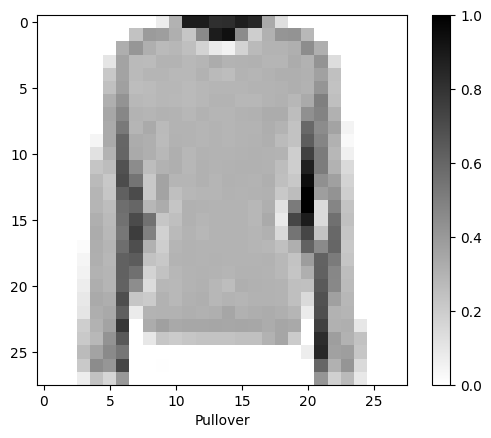

In [9]:
#explore the preprocessed data 

for image, label in train_data.take(1): 
    break
image = image.numpy().reshape((28,28)) #taking an image and reshapping it

#plot the image to a fashion cloth 
plt.figure()
plt.imshow(image, cmap= plt.cm.binary)
plt.colorbar()
plt.xlabel(class_names[label])
plt.show()

In [11]:
#now we set our layers 

model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape = (28,28,1)), # input take an image of size 28 * 28 of 
                                                    # 1bit pixel  and flatten the matrix to vector
        tf.keras.layers.Dense(128, activation= tf.nn.relu) ,# hidden layer of 128 units with 
                                                            #activation funciton as relu
        tf.keras.layers.Dense(10, activation= tf.nn.softmax) #output layer would have softmax as 
                                                                #activation function  with 10 units as we have 10 layers
    ]
)

In [12]:
#let's compile the model 

model.compile(
    optimizer= 'adam', 
    loss= tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics= ['accuracy']
)

In [13]:
#lets train the model in batch size of 32
BATCH_SIZE = 32
train_data = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_data = test_dataset.cache().batch(BATCH_SIZE)

In [15]:
model.fit(train_data, epochs= 7, steps_per_epoch=math.ceil(num_train_examples / BATCH_SIZE))

Epoch 1/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2792 - accuracy: 0.8966
Epoch 2/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2692 - accuracy: 0.8998
Epoch 3/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2562 - accuracy: 0.9056
Epoch 4/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2435 - accuracy: 0.9100
Epoch 5/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2360 - accuracy: 0.9115
Epoch 6/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2316 - accuracy: 0.9125
Epoch 7/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2265 - accuracy: 0.9160


In [16]:
#now we evaluate it in test dataset 
test_loss, test_accuracy =  model.evaluate(test_data, steps = math.ceil(num_test_examples / BATCH_SIZE))
print("Accuracy on test data ", test_accuracy)


313/313 [==============================] - 1s 3ms/step - loss: 0.3409 - accuracy: 0.8829
Accuracy on test data  0.8828999996185303


In [19]:
#now we make predictions of test data

for test_images, test_labels in test_data.take(1):
    break
test_images = test_images.numpy()
test_labels = test_labels.numpy()

predictions = model.predict(test_images)


1/1 [==============================] - 0s 27ms/step


In [20]:
predictions.shape

(32, 10)

In [21]:
predictions[0]

array([1.49659456e-06, 7.25050143e-07, 1.99968205e-03, 4.38570278e-05,
       9.70325351e-01, 1.06527234e-13, 2.76287049e-02, 9.80123649e-10,
       2.59357790e-07, 1.66179015e-11], dtype=float32)

In [22]:
test_labels[0]

4

In [26]:
np.argmax(predictions[0])

4

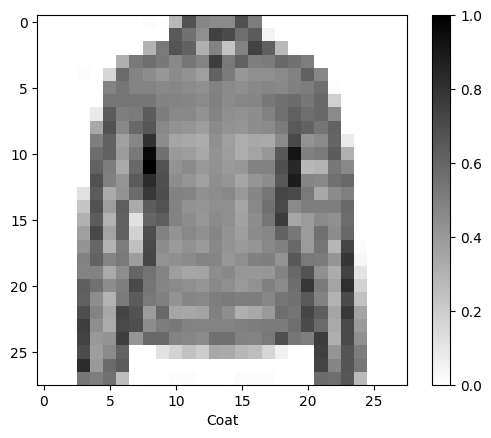

Coat


In [28]:
#model is confident that it is coat


plt.figure()
plt.imshow(test_images[0],cmap= plt.cm.binary)
plt.colorbar()
plt.xlabel(class_names[test_labels[0]])
plt.show()

print(class_names[4])

It is indeed a coat

In [29]:
#now we try to reset using more layers

model_ = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape = (28,28,1)), 
        tf.keras.layers.Dense(128, activation=tf.nn.relu), 
        tf.keras.layers.Dense(128, activation= tf.nn.leaky_relu), 
        tf.keras.layers.Dense(10, activation= tf.nn.softmax)
    ]
)

In [30]:
model_.compile(
    optimizer= 'adam', 
    loss= tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy']
)

In [31]:
model_.fit(train_data, epochs=7, steps_per_epoch= math.ceil(num_train_examples/ BATCH_SIZE))

Epoch 1/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4782 - accuracy: 0.8277
Epoch 2/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3675 - accuracy: 0.8651
Epoch 3/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3292 - accuracy: 0.8797
Epoch 4/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3088 - accuracy: 0.8844
Epoch 5/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2829 - accuracy: 0.8942
Epoch 6/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2772 - accuracy: 0.8969
Epoch 7/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2628 - accuracy: 0.9016


In [32]:
test_loss , test_accuracy = model_.evaluate(test_data, steps= math.ceil(num_test_examples/BATCH_SIZE))
print(test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3426 - accuracy: 0.8807
0.8806999921798706


In [33]:
for test_images, test_labels in test_data.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model_.predict(test_images)



1/1 [==============================] - 0s 66ms/step


In [34]:
predictions.shape

(32, 10)

In [35]:
predictions[0]

array([1.6450840e-04, 6.0342158e-05, 1.6312750e-02, 1.2865740e-04,
       8.9834392e-01, 7.0176149e-08, 8.4980316e-02, 2.4168626e-06,
       6.7748074e-06, 2.5924291e-07], dtype=float32)

In [36]:
np.argmax(predictions[0])

4

In [37]:
test_labels[0]

4

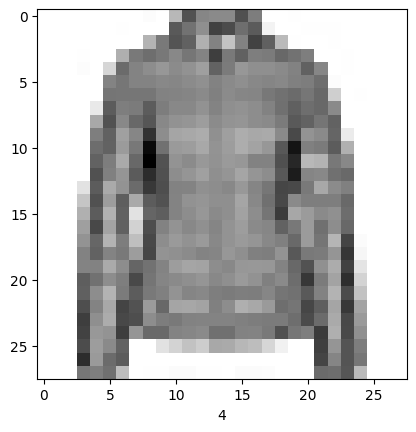

In [38]:
plt.figure()
plt.imshow(test_images[0].reshape(28,28),cmap= plt.cm.binary)
plt.xlabel(test_labels[0])
plt.show()